In [4]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
IMAGE_SHAPE=(224,224)
classifier=tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
]
)

In [7]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

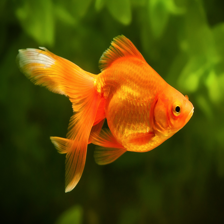

In [11]:
gold_fish=Image.open("Goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [12]:
gold_fish=np.array(gold_fish)/225
gold_fish.shape

(224, 224, 3)

In [13]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [15]:
result=classifier.predict(gold_fish[np.newaxis,...])

In [16]:
result.shape

(1, 1001)

In [17]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [18]:
dataset_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228827136/228813984 [==============================] - 244s 1us/step


In [19]:
 data_dir

'.\\datasets\\flower_photos'

In [20]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [21]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [22]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [23]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

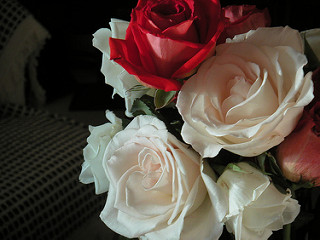

In [25]:
Image.open(str(roses[1]))

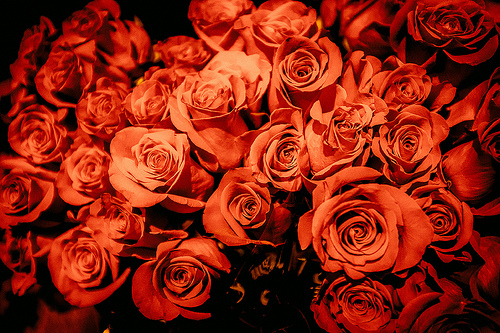

In [26]:
Image.open(str(roses[2]))

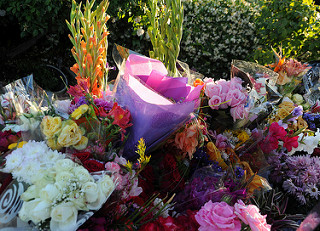

In [28]:
Image.open(str(roses[3]))

In [29]:
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

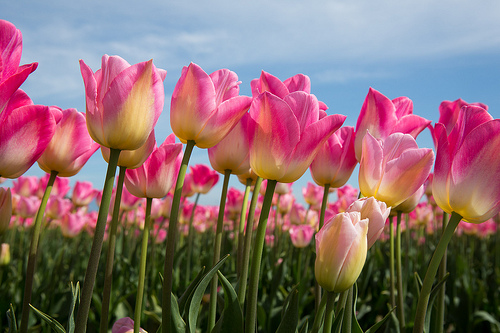

In [30]:
Image.open(str(tulips[3]))

In [31]:
flowers_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [32]:
flowers_image_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [33]:
flowers_label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [34]:
str(flowers_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [36]:
img=cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [37]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [38]:
X,y=[],[]

for flower_name,images in flowers_image_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_image)
        y.append(flowers_label_dict[flower_name])
    

In [39]:
X=np.array(X)
y=np.array(y)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=0)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [41]:
X_train_scale=X_train/255
X_test_scale=X_test/255

In [42]:
X_train_scale[0]

array([[[0.27843137, 0.3254902 , 0.31764706],
        [0.24705882, 0.28235294, 0.2627451 ],
        [0.25490196, 0.27058824, 0.24705882],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.23137255, 0.25882353, 0.25490196],
        [0.23137255, 0.25490196, 0.23529412],
        [0.25490196, 0.2627451 , 0.23921569],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.21960784, 0.22352941, 0.21960784],
        [0.23921569, 0.24313725, 0.22745098],
        [0.25098039, 0.25098039, 0.22745098],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16470588, 0.15294118]],

       ...,

       [[0.19215686, 0.49803922, 0.37647059],
        [0.14901961, 0.2627451 , 0.19607843],
        [0.20392157, 0

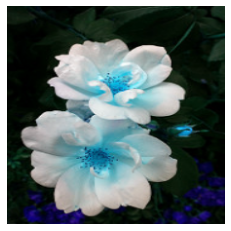

In [43]:
plt.axis('off')
plt.imshow(X[0])

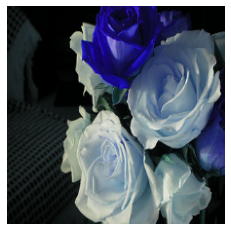

In [44]:
plt.axis('off')
plt.imshow(X[1])

In [46]:
predicted=classifier.predict(np.array([X[0],X[1],X[2]]))


In [47]:
predicted=np.argmax(predicted,axis=1)
predicted

array([795, 880, 795], dtype=int64)

In [49]:
feature_extraction_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extraction_model,input_shape=(224,224,3),trainable=False
)

In [51]:
num_of_flowers=5

model=tf.keras.Sequential([pretrained_model_without_top_layer,tf.keras.layers.Dense(num_of_flowers)])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [54]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc'])
model.fit(X_train_scale,y_train,epochs=5)
#tf.keras.losses.sparse_categorical_crossentropy(from_logits=True)

Epoch 1/5
86/86 [==============================] - 185s 2s/step - loss: 4.2089 - acc: 0.4640
Epoch 2/5
86/86 [==============================] - 168s 2s/step - loss: 1.8127 - acc: 0.6159
Epoch 3/5
86/86 [==============================] - 204s 2s/step - loss: 1.4507 - acc: 0.6559
Epoch 4/5
86/86 [==============================] - 155s 2s/step - loss: 1.4125 - acc: 0.6857
Epoch 5/5
86/86 [==============================] - 159s 2s/step - loss: 1.3949 - acc: 0.6813
